In [1]:
import autograd as ag

value a+b: 3.0, grad 0.0
value a*b: 2.0, grad 0.0
value a*m+b: 5.0, grad 1.0
value a: 1.0, grad 3.0
value b: 2.0, grad 1.0


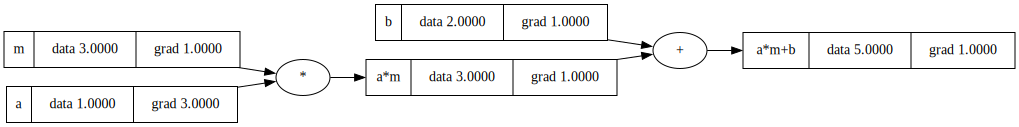

In [2]:
a = ag.Value(1.0, "a")
b = ag.Value(2.0, "b")

print(a + b)
print(a * b)

m = ag.Value(3.0, "m")
d = a * m + b
d.backward()

print(d)
print(a)
print(b)

d.draw_graph()

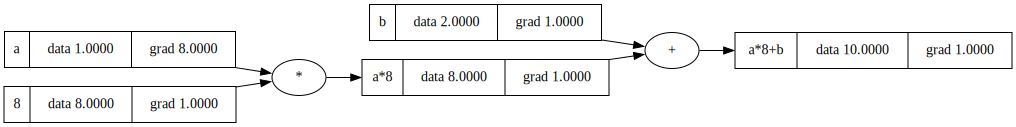

In [3]:
e = a * 8 + b
e.zero_grad()
e.backward()
e.draw_graph()